In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np
import csv
import itertools

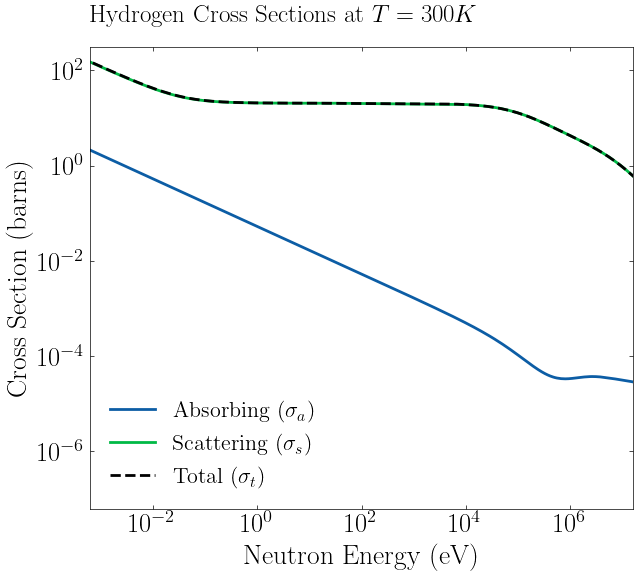

In [8]:
H_data_a = pd.read_csv('data/h_cross_a.txt',sep='\s+')
H_data_t = pd.read_csv('data/h_cross_t.txt',sep='\s+')
H_data_s = pd.read_csv('data/h_cross_s.txt',sep='\s+')

plt.figure(figsize=(7, 6))
plt.loglog(H_data_a["energy(eV)"], H_data_a["sigma_a(b)"], linewidth=2, label=r"$\text{Absorbing} \ (\sigma_a)$")
plt.loglog(H_data_s["energy(eV)"], H_data_s["sigma_s(b)"], linestyle="-", linewidth=2, label=r"$\text{Scattering} \ (\sigma_s)$")
plt.loglog(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], linestyle="--", linewidth=2, color="k", label=r"$\text{Total} \ (\sigma_t)$")
plt.xlabel(r"$\text{Neutron Energy (eV)}$", fontsize=20)
plt.ylabel(r"$\text{Cross Section (barns)}$", fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-7.2, 10**2.5)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.title(r"Hydrogen Cross Sections at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("data/H_cross.pdf")
plt.show()

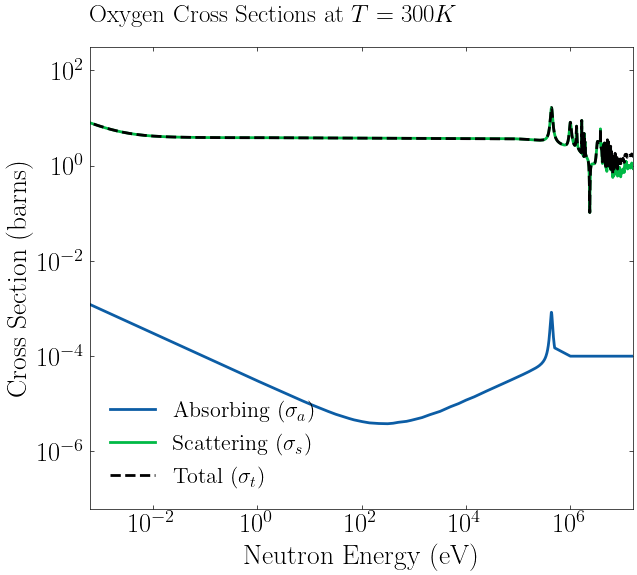

In [9]:
O_data_a = pd.read_csv('data/o_cross_a.txt',sep='\s+')
O_data_t = pd.read_csv('data/o_cross_t.txt',sep='\s+')
O_data_s = pd.read_csv('data/o_cross_s.txt',sep='\s+')

plt.figure(figsize=(7, 6))
plt.loglog(O_data_a["energy(eV)"], O_data_a["sigma_a(b)"], linewidth=2, label=r"$\text{Absorbing} \ (\sigma_a)$")
plt.loglog(O_data_s["energy(eV)"], O_data_s["sigma_s(b)"], linestyle="-", linewidth=2, label=r"$\text{Scattering} \ (\sigma_s)$")
plt.loglog(O_data_t["energy(eV)"], O_data_t["sigma_t(b)"], linestyle="--", linewidth=2, color="k", label=r"$\text{Total} \ (\sigma_t)$")
plt.xlabel(r"$\text{Neutron Energy (eV)}$", fontsize=20)
plt.ylabel(r"$\text{Cross Section (barns)}$", fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-7.2, 10**2.5)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.title(r"Oxygen Cross Sections at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("data/O_cross.pdf")
plt.show()

In [20]:
def index_closest(data: pd.DataFrame, val: float, n: int) -> list:
    """
    Get indices of the n values closest to a given value.
    """
    df_sort = data.iloc[(data-val).abs().argsort()[:n]]
    return df_sort.index.tolist()

def find_closest(data1: pd.DataFrame, data2: pd.DataFrame, range: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Get the closest values of data1 to the values in the given range and the corresponding values 
    of data2.
    """
    x, y = [], []
    for val in range:
        i = index_closest(data1, val, 1)[0]
        x.append(data1[i])
        y.append(data2[i])
    return np.array(x), np.array(y)

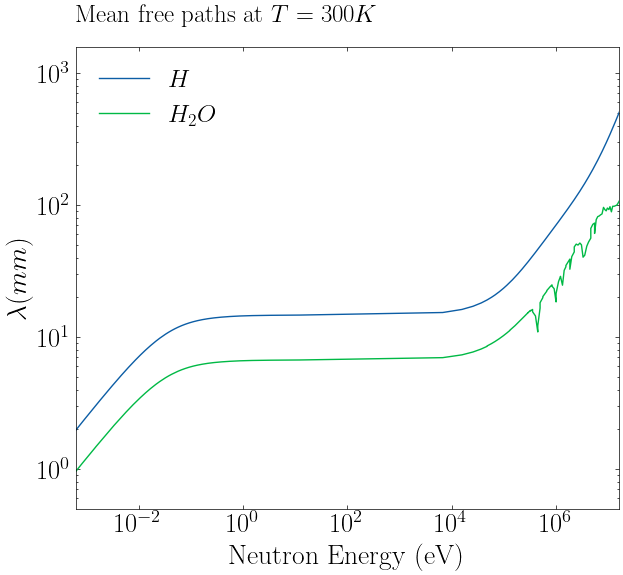

In [138]:
rho = 997 #kg/m^3
M = 0.01801528 #kg/mol
N_A =6.02214076*10**23 #mol^-1
n = rho *N_A / M # kg/m^3 * 1/mol * mol/kg = m^-3 
 
energy_range = np.logspace(-5, 8, 500, endpoint=True)


plt.figure(figsize=(7 ,6))

# ONLY H ATOMS
energies, cross_sections_H = find_closest(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], energy_range)
cross_sections_H = cross_sections_H*10**(-28) # convert barns -> m^2
mean_free_paths_H = 1/(cross_sections_H*n) # 1 / (m^2 * m^-3) = m
plt.loglog(energies, mean_free_paths_H*1000, label = "$H$") # m -> mm

# H2O
energies, cross_sections_O = find_closest(O_data_t["energy(eV)"], O_data_t["sigma_t(b)"], energy_range)
energies, cross_sections_H = find_closest(H_data_t["energy(eV)"], H_data_t["sigma_t(b)"], energy_range)
cross_sections_H = cross_sections_H*10**(-28) # convert barns -> m^2
cross_sections_O = cross_sections_O*10**(-28) # convert barns -> m^2
mean_free_paths_H2O = 1/ (n*(2*cross_sections_H + cross_sections_O)) # (1 / m^2) * m^-3) = m
plt.loglog(energies, mean_free_paths_H2O*1000, label = "$H_2O$") # m -> mm


# Save H2O mean free path data
with open("data/mean_free_path.csv", "w") as f:
    write = csv.writer(f)
    df = pd.DataFrame({"Energy(eV)": energies ,"lambda(m)": mean_free_paths_H2O})
    df.to_csv("data/mean_free_path.csv", index=False)


plt.xlabel("Neutron Energy (eV)", fontsize=20)
plt.ylabel("$\lambda(mm)$", fontsize=20)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.legend(fontsize=18, loc = "upper left")
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-0.3, 10**3.2)
plt.title(r"Mean free paths at $T=300K$", fontsize=18, pad=18, loc = 'left')
plt.savefig("data/free_path.pdf")
plt.show()